In [6]:
prime_minister=['A',3,'Okay',2,4,'Hello',5,'cool',0,'Modi',6]
def the_oracle(my_input):
    winner='Modi'
    if my_input is winner:
        response= True
    else:
        response= False
    return response

In [7]:
for index, trial_number in enumerate(prime_minister):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i'%index)
        print('%i calls to the Oracle used'%(index+1))
        break

Winner found at index 9
10 calls to the Oracle used


In [3]:
from qiskit import*
import matplotlib.pyplot as plt
import numpy as np

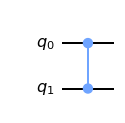

In [4]:
#define the oracle circuit
oracle= QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw('mpl')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


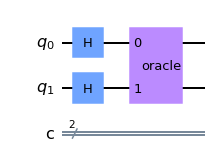

In [5]:
backend= Aer.get_backend('statevector_simulator')
grover_circ= QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

In [6]:
job= execute(grover_circ,backend)
result=job.result()

In [7]:
sv= result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [8]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

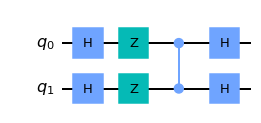

In [9]:
reflection.draw('mpl')

In [10]:
backend =Aer.get_backend('qasm_simulator')
grover_circ= QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

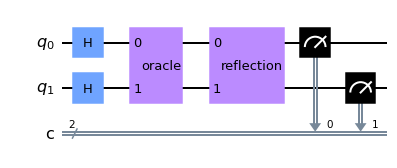

In [11]:
grover_circ.draw('mpl')

In [12]:
job=execute(grover_circ,backend,shots=1)
result=job.result()
result.get_counts()

{'11': 1}

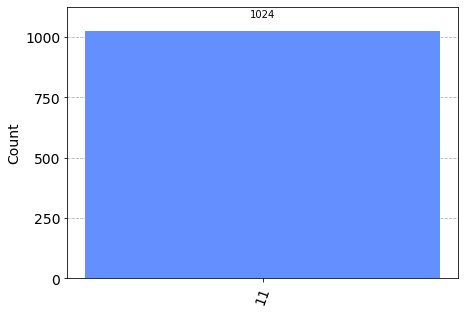

In [13]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(grover_circ, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [15]:
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [16]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-12-08 07:24:50,576: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_lima


In [17]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circ, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


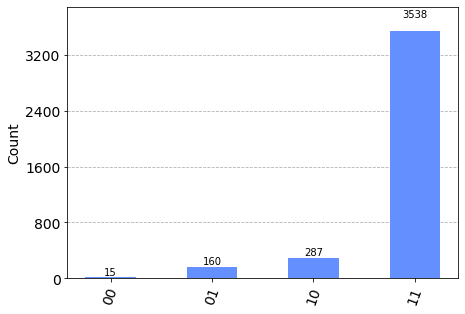

In [19]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(transpiled_grover_circuit)
plot_histogram(answer)